<a id='1'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
import os
import imageio

In [2]:
data_dir='/Users/ilia/tumorDetection/archive-2/Brain Tumor Data Set/Brain Tumor Data Set'

In [3]:
types=os.listdir(data_dir)
types = [t for t in types if os.path.isdir(os.path.join(data_dir, t))]

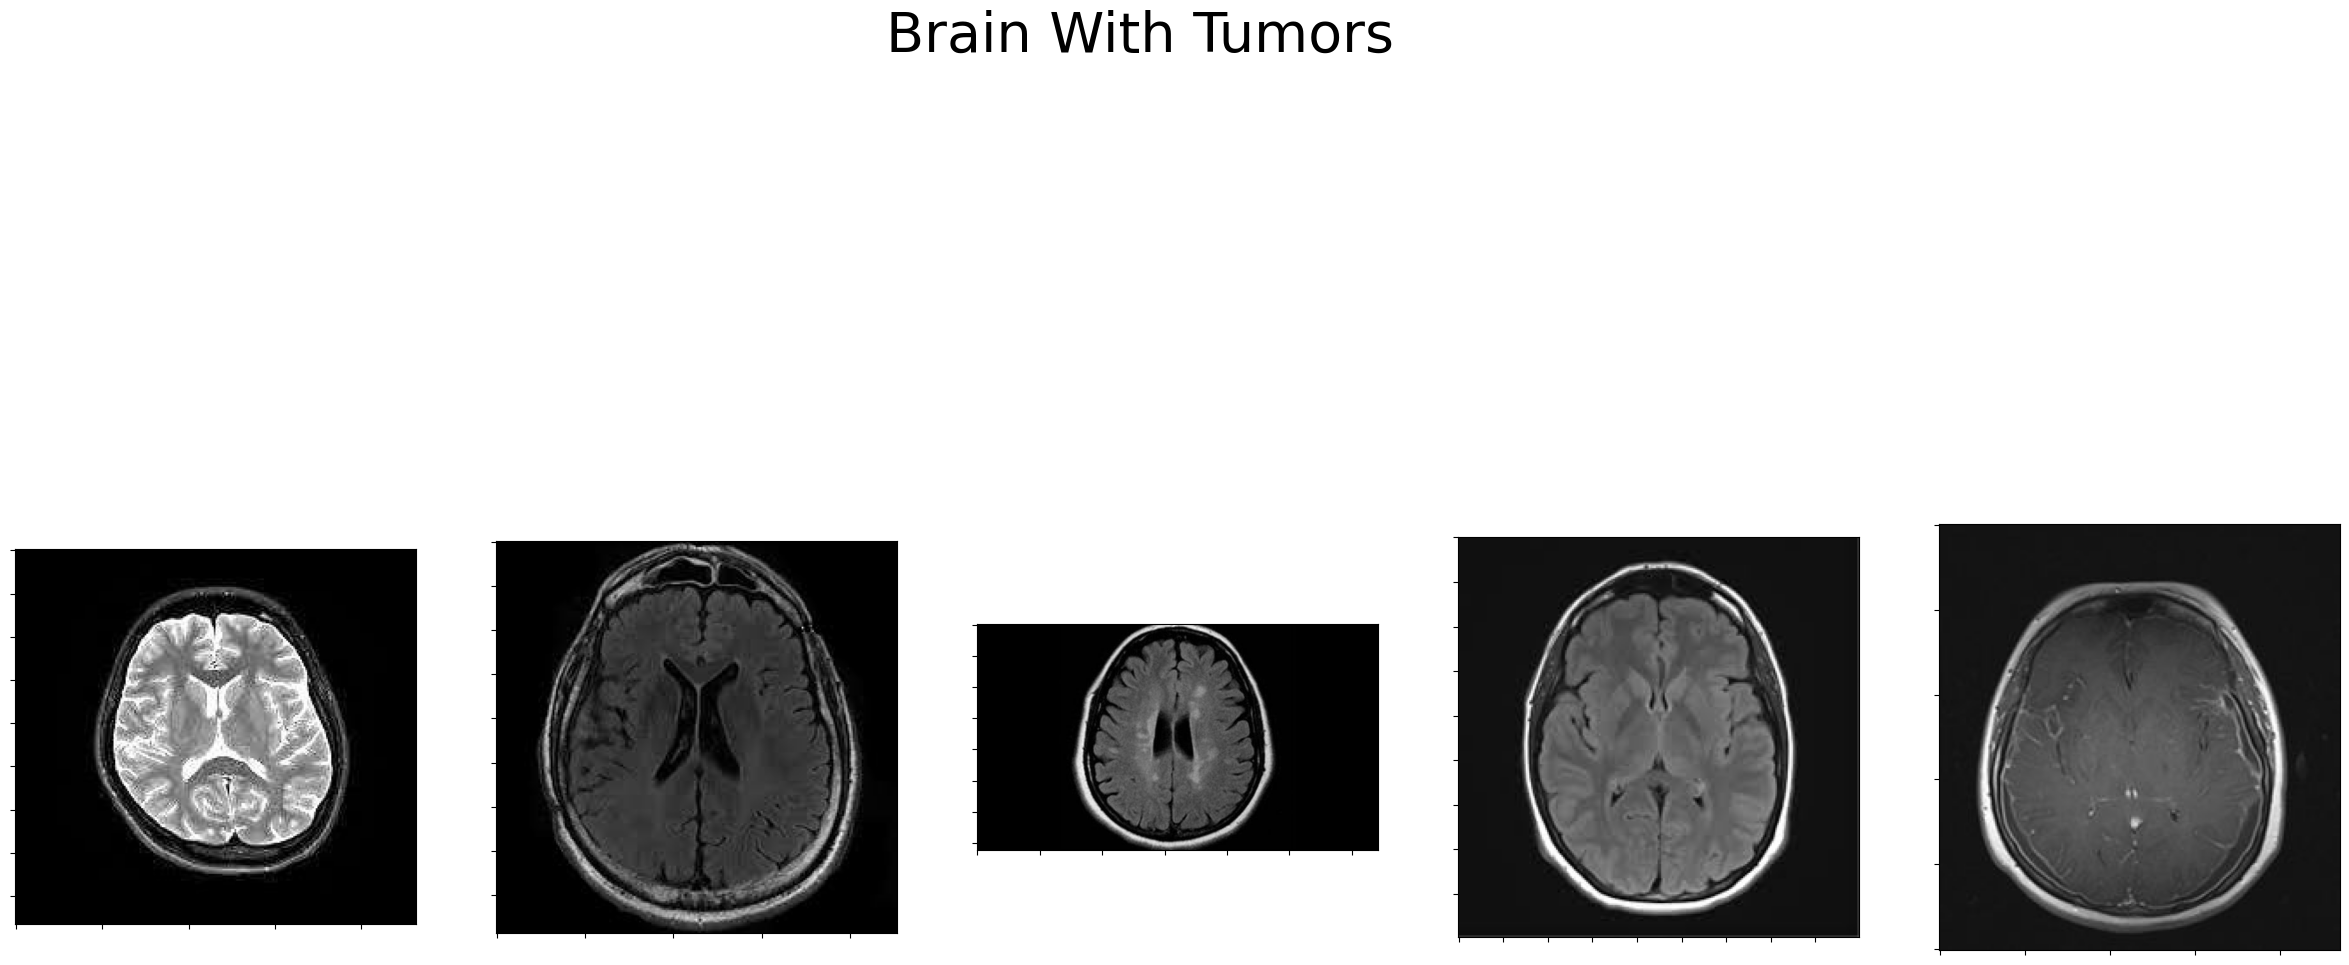

In [4]:
fig,ax=plt.subplots(1,5,figsize=(30,15))
for i in range(5):
    img=os.listdir(os.path.join(data_dir,types[0]))[i]
    img_=os.path.join(data_dir,types[0],img)
    image=imageio.imread(img_)
    ax[i].imshow(image)
    fig.suptitle("Brain With Tumors", fontsize=40)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

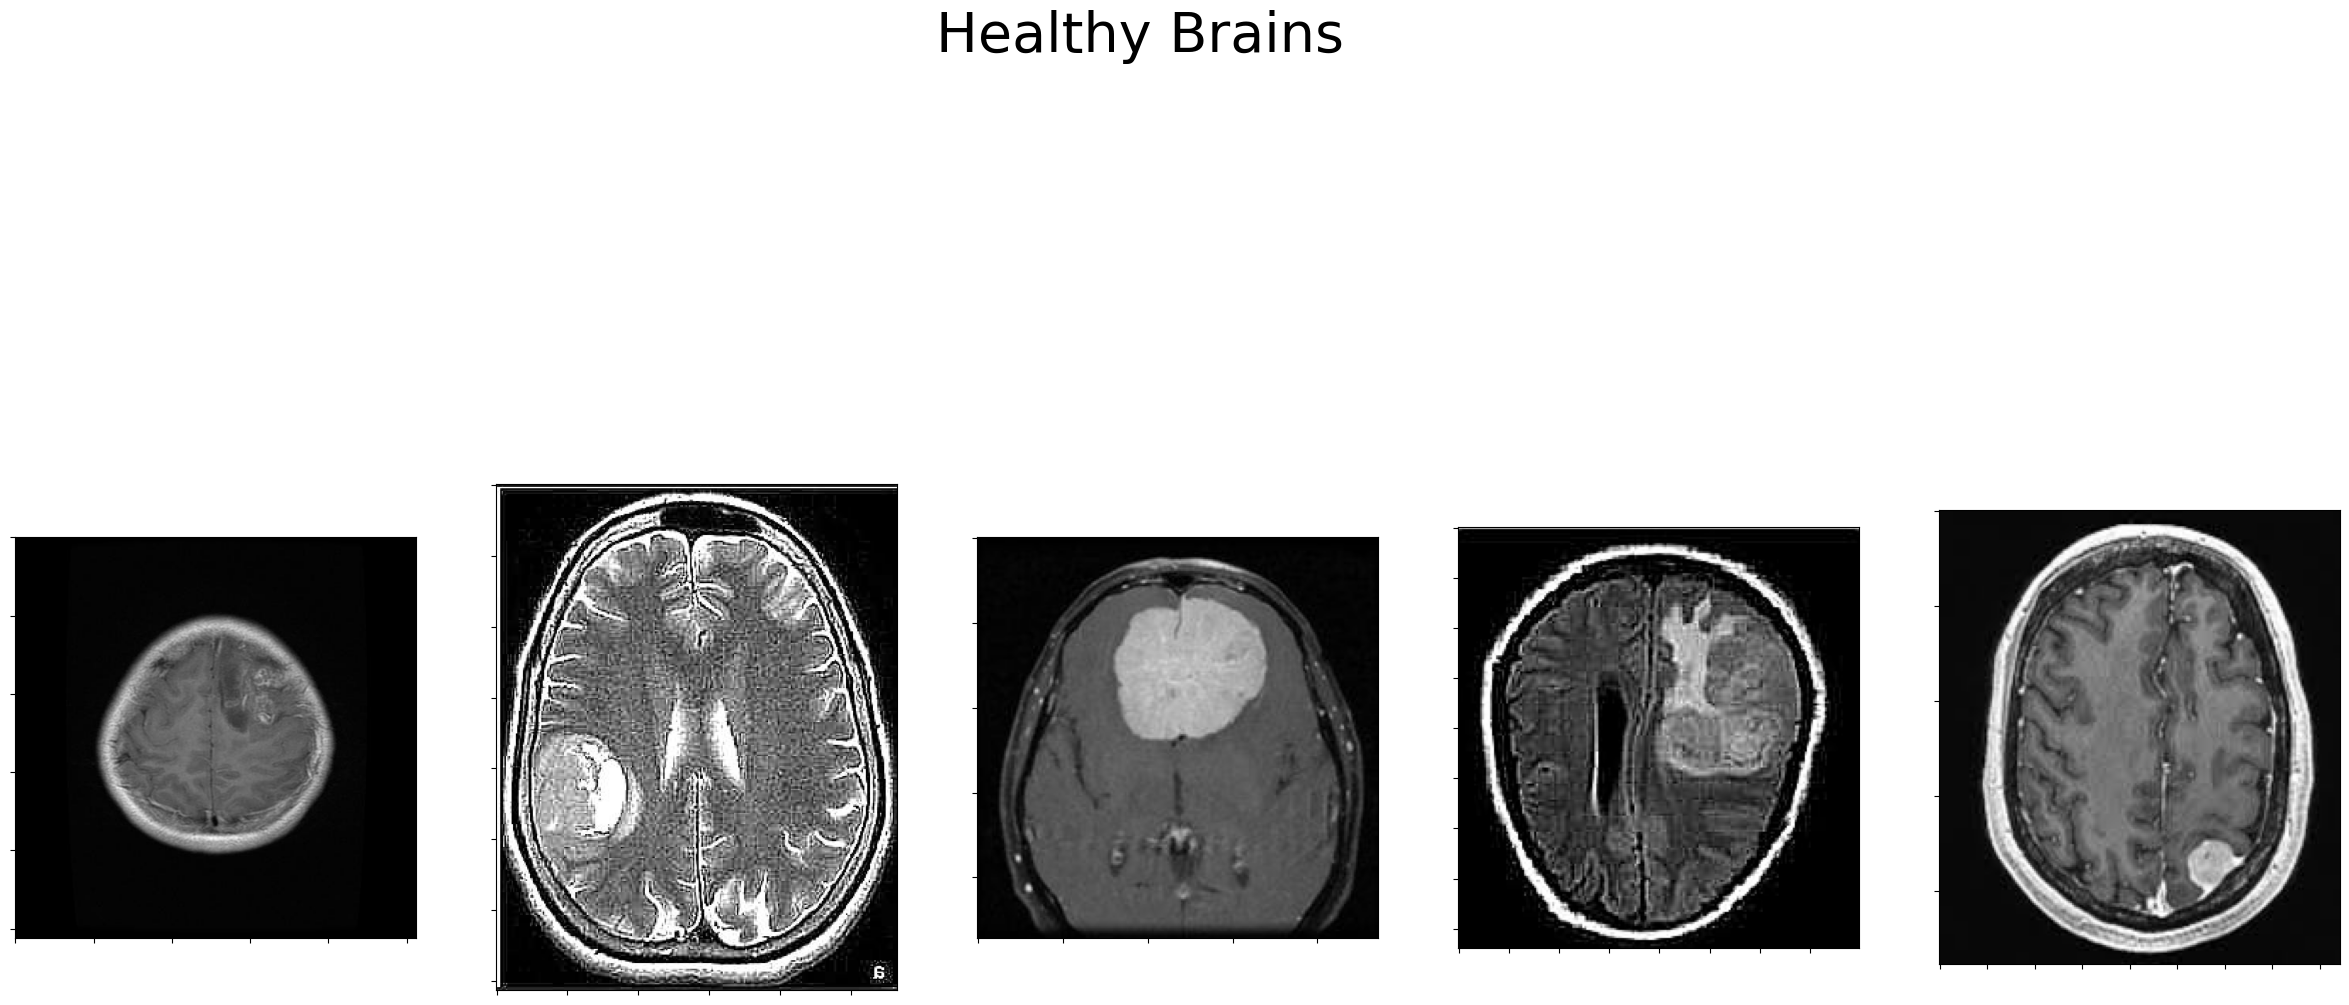

In [31]:
fig,ax=plt.subplots(1,5,figsize=(30,15))
for i in range(5):
    img=os.listdir(os.path.join(data_dir,types[1]))[i]
    img_=os.path.join(data_dir,types[1],img)
    image=imageio.imread(img_)
    ax[i].imshow(image) 
    fig.suptitle("Healthy Brains", fontsize=40)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

Text(0.5, 1.0, 'Class distributions')

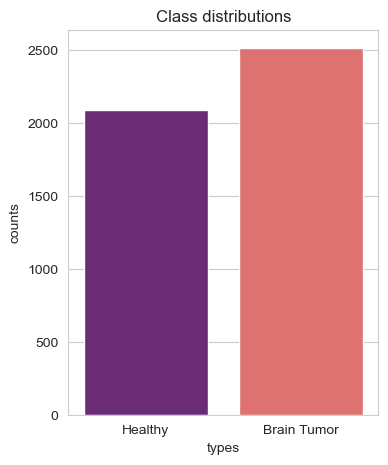

In [8]:
arr_counts=[len(os.listdir(os.path.join(data_dir,types[i]))) for i in range(len(types))]
data={'types':types,'counts':arr_counts}
df=pd.DataFrame(data)
sns.set_style('whitegrid')
plt.figure(figsize=(4,5))
sns.barplot(x='types',y='counts',data=df,palette='magma')
plt.xticks(rotation=0)
plt.title('Class distributions')

In [13]:
img_size=224
batch_size=32

In [15]:
datagen_ =ImageDataGenerator(
                            rescale=1./255,
                            featurewise_center=False,
                            featurewise_std_normalization=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            validation_split=0.2
                            
)
train_generator=datagen_.flow_from_directory(data_dir,
                                            target_size=(img_size,img_size),
                                            batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='training',
                                             shuffle=True
                                            )
val_generator=datagen_.flow_from_directory(data_dir,
                                            target_size=(img_size,img_size),
                                            batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='validation',
                                             shuffle=True
                                            )

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [17]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(224, 224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0005)#Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 28,987,778 (110.58 MB)

 Trainable params: 28,983,810 (110.56 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [19]:
epochs = 10
steps_per_epoch = train_generator.n//train_generator.batch_size
val_steps = val_generator.n//val_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint(filepath="model_weights.weights.h5", monitor='val_accuracy',
                        save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint,reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = val_generator,
    validation_steps = val_steps,
    callbacks=callbacks
)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6343 - loss: 0.7228
Epoch 1: saving model to model_weights.weights.h5
115/115 ━━━━━━━━━━━━━━━━━━━━ 1136s 10s/step - accuracy: 0.6345 - loss: 0.7225 - val_accuracy: 0.5424 - val_loss: 1.0931 - learning_rate: 5.0000e-04
Epoch 2/10
  1/115 ━━━━━━━━━━━━━━━━━━━━ 13:16 7s/step - accuracy: 0.6562 - loss: 0.5866

2024-12-05 15:20:33.649995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: saving model to model_weights.weights.h5


2024-12-05 15:20:35.045818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6562 - loss: 0.2959 - val_accuracy: 0.6957 - val_loss: 0.3715 - learning_rate: 5.0000e-04
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7223 - loss: 0.5599
Epoch 3: saving model to model_weights.weights.h5
115/115 ━━━━━━━━━━━━━━━━━━━━ 873s 8s/step - accuracy: 0.7225 - loss: 0.5596 - val_accuracy: 0.5391 - val_loss: 1.4137 - learning_rate: 5.0000e-04
Epoch 4/10
  1/115 ━━━━━━━━━━━━━━━━━━━━ 13:59 7s/step - accuracy: 0.8438 - loss: 0.2669

2024-12-05 15:35:15.912146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: saving model to model_weights.weights.h5


2024-12-05 15:35:17.216699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8438 - loss: 0.1346 - val_accuracy: 0.8261 - val_loss: 0.2858 - learning_rate: 5.0000e-04
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7706 - loss: 0.4853
Epoch 5: saving model to model_weights.weights.h5
115/115 ━━━━━━━━━━━━━━━━━━━━ 893s 8s/step - accuracy: 0.7706 - loss: 0.4853 - val_accuracy: 0.6618 - val_loss: 0.6357 - learning_rate: 5.0000e-04
Epoch 6/10
  1/115 ━━━━━━━━━━━━━━━━━━━━ 14:01 7s/step - accuracy: 0.6250 - loss: 0.7677

2024-12-05 15:50:17.399880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: saving model to model_weights.weights.h5


2024-12-05 15:50:18.661529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6250 - loss: 0.3872 - val_accuracy: 0.6087 - val_loss: 0.3730 - learning_rate: 5.0000e-04
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8017 - loss: 0.4416
Epoch 7: saving model to model_weights.weights.h5
115/115 ━━━━━━━━━━━━━━━━━━━━ 899s 8s/step - accuracy: 0.8017 - loss: 0.4414 - val_accuracy: 0.6417 - val_loss: 0.7270 - learning_rate: 5.0000e-05
Epoch 8/10
  1/115 ━━━━━━━━━━━━━━━━━━━━ 14:00 7s/step - accuracy: 0.8750 - loss: 0.3449

2024-12-05 16:05:25.054502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: saving model to model_weights.weights.h5


2024-12-05 16:05:26.354871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8750 - loss: 0.1740 - val_accuracy: 0.4783 - val_loss: 0.4671 - learning_rate: 5.0000e-05
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8363 - loss: 0.3787
Epoch 9: saving model to model_weights.weights.h5
115/115 ━━━━━━━━━━━━━━━━━━━━ 896s 8s/step - accuracy: 0.8362 - loss: 0.3787 - val_accuracy: 0.7790 - val_loss: 0.4807 - learning_rate: 1.0000e-05
Epoch 10/10
  1/115 ━━━━━━━━━━━━━━━━━━━━ 13:20 7s/step - accuracy: 0.8438 - loss: 0.3364

2024-12-05 16:20:29.510567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: saving model to model_weights.weights.h5


2024-12-05 16:20:30.874538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8438 - loss: 0.1697 - val_accuracy: 0.7826 - val_loss: 0.2157 - learning_rate: 1.0000e-05


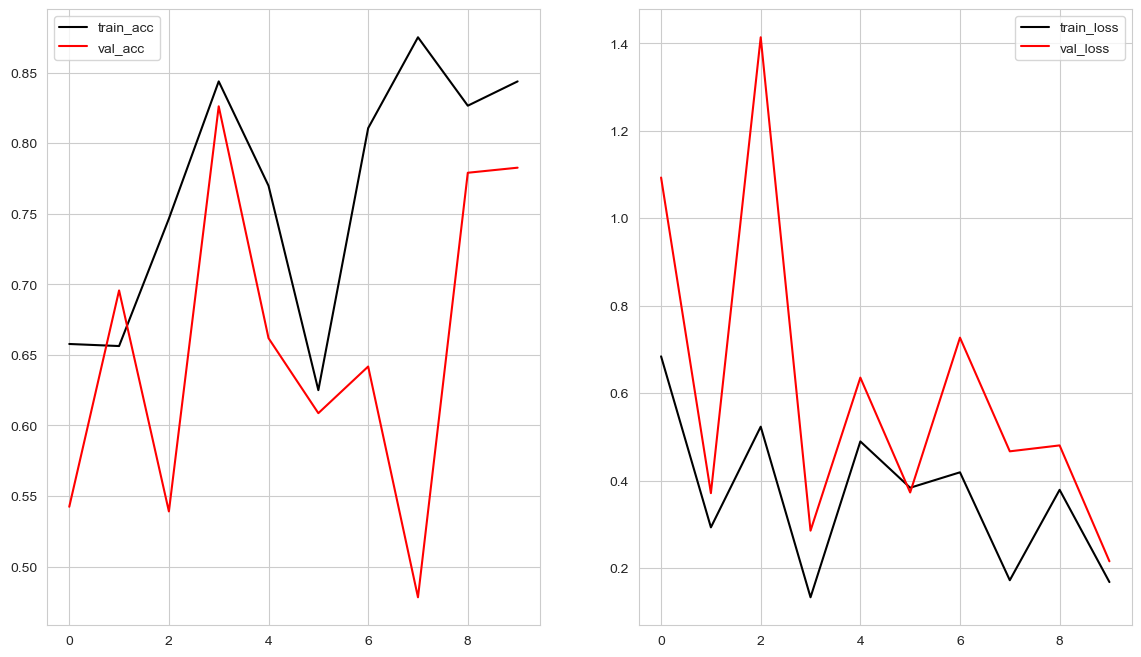

In [32]:
#Evaluation
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,8))
epochs_=np.arange(10)
ax[0].plot(epochs_,history.history['accuracy'],'-',color='black',label='train_acc')
ax[0].plot(epochs_,history.history['val_accuracy'],'-',color='red',label='val_acc')
ax[1].plot(epochs_ , history.history['loss'] , '-' ,color='black',label='train_loss')
ax[1].plot(epochs_ ,history.history['val_loss'] , '-' ,color='red',label='val_loss')
ax[0].legend()
ax[1].legend()

In [31]:
eval_val = model.evaluate(val_generator)
print('val loss, val acc:', eval_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7774 - loss: 0.4862
val loss, val acc: [0.48269909620285034, 0.7747551798820496]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


NotADirectoryError: [Errno 20] Not a directory: '/Users/ilia/tumorDetection/archive-2/Brain Tumor Data Set/Brain Tumor Data Set/.DS_Store'

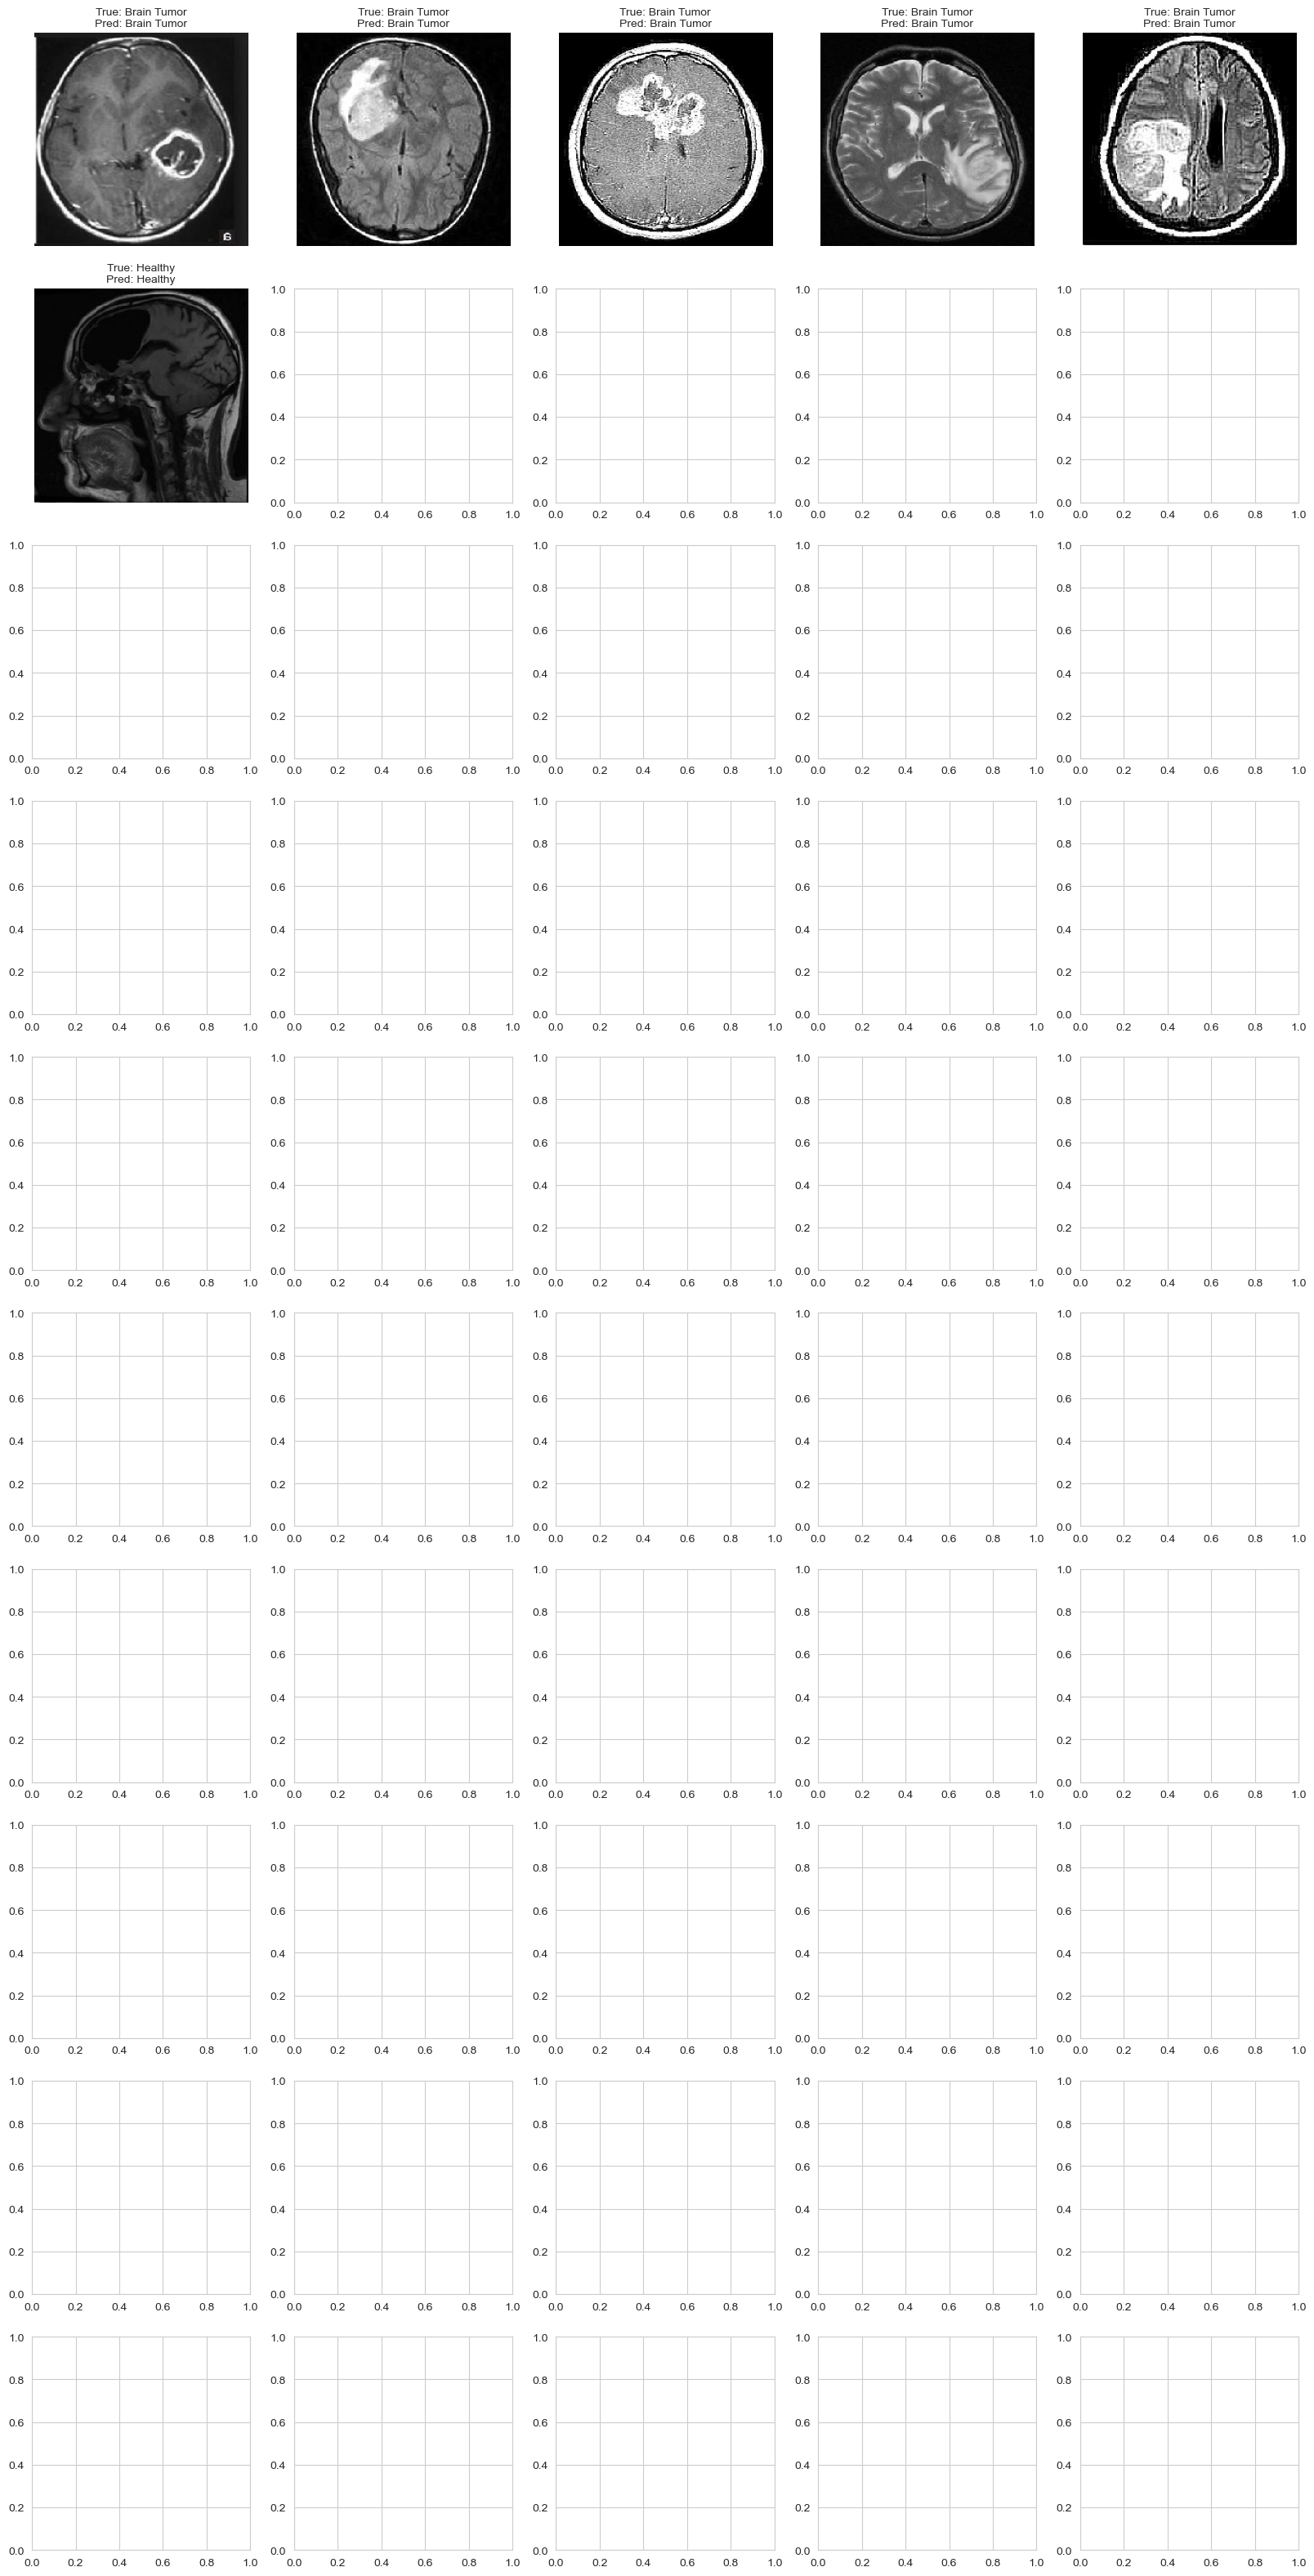

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import random

def test_model_multiple_images(model, data_dir, num_images=50, img_size=224, class_names=None):
    types = os.listdir(data_dir)
    
    images_per_row = 5
    num_rows = (num_images + images_per_row - 1) // images_per_row
    
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 4, num_rows * 4))
    axes = axes.flatten()

    for i in range(num_images):
        random_class = random.choice(types)
        class_dir = os.path.join(data_dir, random_class)
        
        random_image_path = os.path.join(class_dir, random.choice(os.listdir(class_dir)))
        
        img = load_img(random_image_path, target_size=(img_size, img_size))
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        
        true_class = random_class
        predicted_class = class_names[predicted_class_index] if class_names else f"Class {predicted_class_index}"
        
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"True: {true_class}\nPred: {predicted_class}", fontsize=10)

    for j in range(num_images, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

class_names = list(train_generator.class_indices.keys())

test_model_multiple_images(
    model=model,
    data_dir=data_dir,
    num_images=50,
    img_size=224,
    class_names=class_names
)

In [37]:
model.save('my_model1.keras')